In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("merged_data_1st_test.csv")
data

,Bearing 1 X,Bearing 1 Y,Bearing 2 X,Bearing 2 Y,Bearing 3 X,Bearing 3 Y,Bearing 4 X,Bearing 4 Y
0,0.104148,0.100253,0.107147,0.102004,0.106149,0.108150,0.094803,0.099513
1,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
3,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
4,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471
...,...,...,...,...,...,...,...,...
2151,0.138784,0.130001,0.151358,0.138561,0.209843,0.217346,0.165271,0.154710
2152,0.142147,0.131042,0.162772,0.149214,0.339327,0.330122,0.175640,0.163224
2153,0.142098,0.131348,0.167258,0.154300,0.357823,0.351640,0.184356,0.165720
2154,0.141889,0.132988,0.158432,0.153226,0.331172,0.335432,0.174025,0.161537


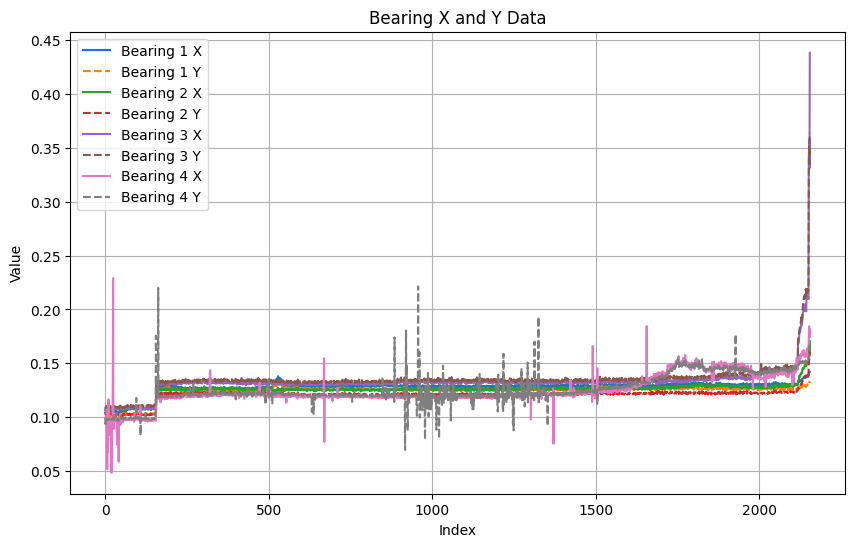

In [19]:
# Plotting all bearing X and Y data against index
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for column in data.columns:
    if 'X' in column:  # Plot X data
        plt.plot(data.index, data[column], label=column, linestyle='-')
    elif 'Y' in column:  # Plot Y data
        plt.plot(data.index, data[column], label=column, linestyle='--')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bearing X and Y Data')
plt.legend()
plt.grid(True)
plt.show()

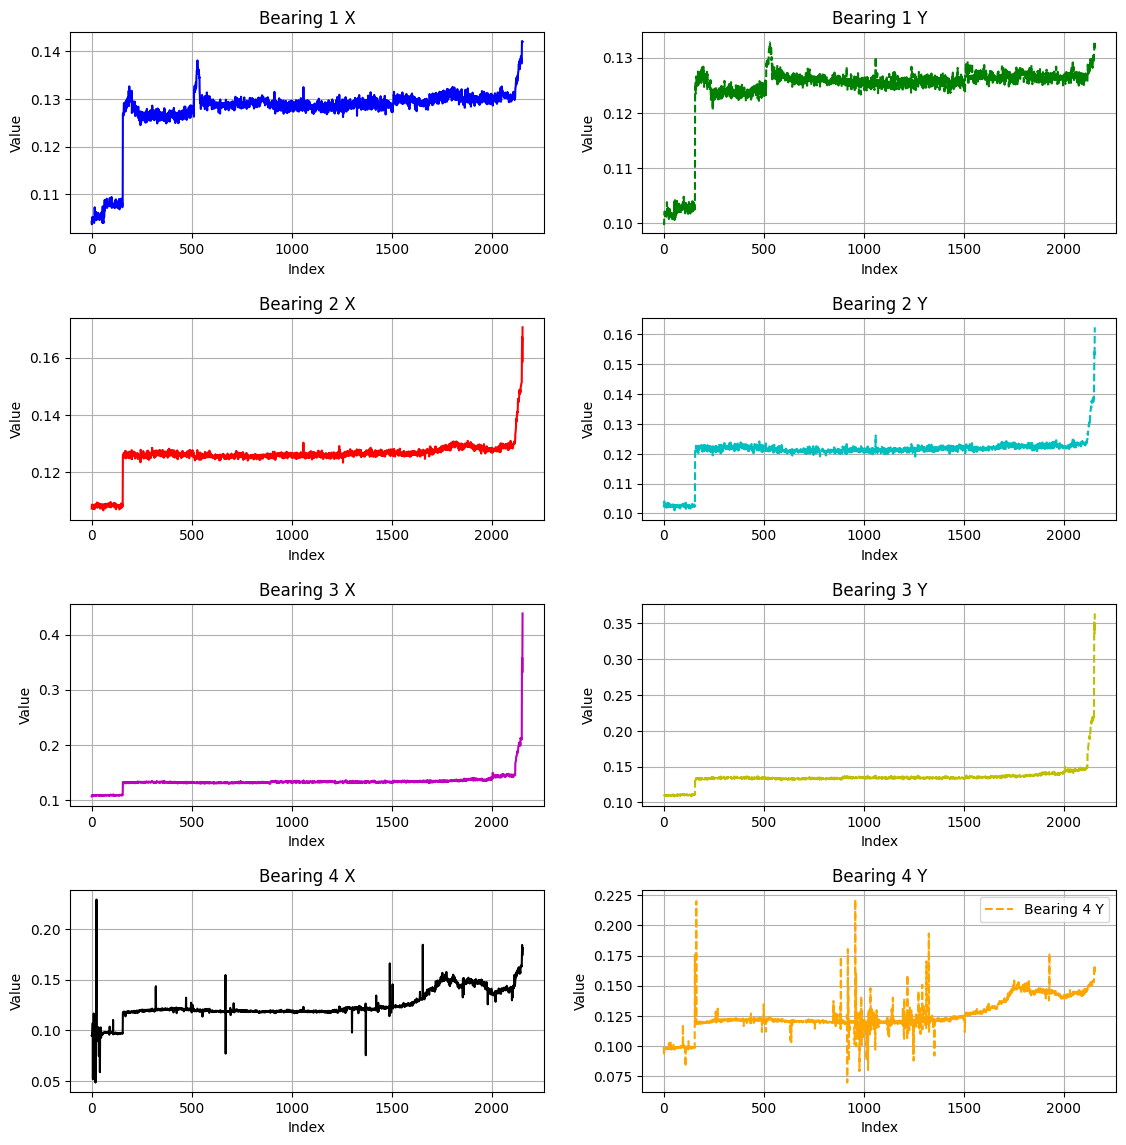

In [14]:
# Create a list of colors for the plots
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Create 8 different plots
fig, axs = plt.subplots(4, 2, figsize=(12, 12))  # Create a 4x2 grid of subplots
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Plot each pair of X and Y bearing data on separate subplots
for i, (ax, column) in enumerate(zip(axs.flatten(), data.columns)):
    if 'X' in column:  # Plot X data
        ax.plot(data.index, data[column], label=column, color=colors[i], linestyle='-')
        ax.set_title(column)
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
        ax.grid(True)
    elif 'Y' in column:  # Plot Y data
        ax.plot(data.index, data[column], label=column, color=colors[i], linestyle='--')
        ax.set_title(column)
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
        ax.grid(True)

# Add legend to the last subplot
axs.flatten()[-1].legend()

plt.show()

Explained Variance Ratio:
[7.70440632e-01 1.09557383e-01 9.35908563e-02 1.80484835e-02
 5.10098752e-03 1.69309282e-03 8.00761504e-04 7.67803167e-04]


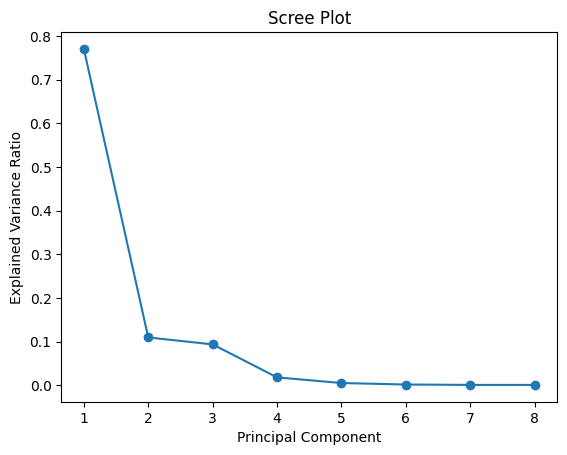

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("merged_data_1st_test.csv")

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("merged_data_1st_test.csv")

# Convert the data to a numpy array
X = data.to_numpy()

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Print the shapes of U, S, and VT matrices
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of VT:", VT.shape)


Shape of U: (2156, 8)
Shape of S: (8,)
Shape of VT: (8, 8)


Number of missing values: 0
Explained Variance Ratio: [7.70440632e-01 1.09557383e-01 9.35908563e-02 1.80484835e-02
 5.10098752e-03 1.69309282e-03 8.00761504e-04 7.67803167e-04]


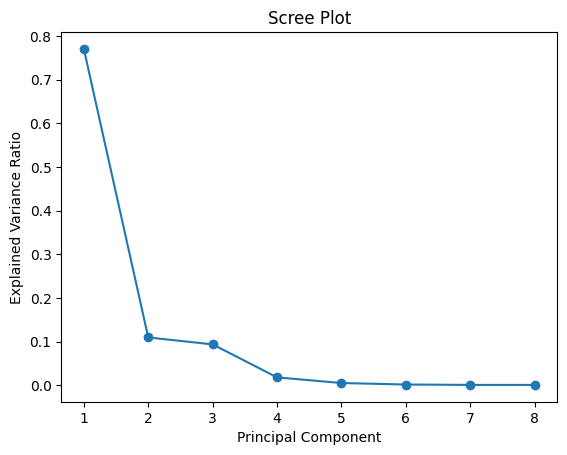

Number of outliers detected: 214


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("merged_data_1st_test.csv")

# Check for missing values
missing_values = data.isnull().sum().sum()
print("Number of missing values:", missing_values)

# Standardize the data
standardized_data = (data - data.mean()) / data.std()

# Perform PCA
pca = PCA()
pca.fit(standardized_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Detect outliers using PCA
distances = pca.transform(standardized_data)
outliers_threshold = 3  # Adjust threshold as needed
outliers = data[np.linalg.norm(distances, axis=1) > outliers_threshold]
print("Number of outliers detected:", len(outliers))